# Note-3: Benchmark ReDeeM using Crispr-based lineage tracing.
---

**Author:** Chen Weng

**Date:** October 27, 2023

## Description

This Jupyter Notebook reproduce the all analyses in Extended Data Fig. 5 and Supplementary Fig.2,3

## Related Figures
- Extended Data Fig. 5 
- Supplementary Fig. 2
- Supplementary Fig. 3



---

# Install redeemR

In [1]:
#devtools::install_github("chenweng1991/redeemR")

# Import libraries

In [2]:
library(redeemR)
library(ggpubr)
library(igraph)
library(Matrix)
library(dplyr)
library(treeio)
library(ggtree)
library(ggtreeExtra)
library(gridExtra)
library(RColorBrewer)
library(qvalue)
library(Seurat)

# Set path

In [3]:
## set main directory to the reproducibility_pub
Dir="/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub" # Change this to your actual path **/reproducibility_pub

In [4]:
source(paste(Dir,"/API/Revision.api",sep=""))

# Process Crispr-based distance (batch1)

## Process Batch1 CRISPR

In [5]:
Samples.batch1<-c("CD24_1","CD47_1","CD47_2","Ctrl_1","Ctrl_2","DKO_1")
plot_titles<-paste(c('CD24_1','CD47_1','CD47_2','Ctrl_1','Ctrl_2','DKO_1'),c('T1','T6','T2','T5','T3','T4'),sep=":")

In [6]:
## Read in a list of weighted hamming distance for each sample
whm.list.batch1<-list()
for(name in Samples.batch1){
filename=paste(Dir,"/data/CRISPR/batch1/weighted_hm_distance.",name,sep="")
    whm<-read.csv(filename,row.names = 1)
    whm.list.batch1<-c(whm.list.batch1,list(whm))
}
names(whm.list.batch1)<-Samples.batch1

In [7]:
## Preprocessing whm.list
whm.list.batch1<-lapply(whm.list.batch1,function(x){
    x[is.na(x)]<-1
    return(x)
})

#### CellNames are ATAC version names
CellNames<-lapply(whm.list.batch1,function(x){gsub("_","",Translate_simple_RNA2ATAC(row.names(x)))})
for(i in 1:6){
    row.names(whm.list.batch1[[i]])<-colnames(whm.list.batch1[[i]])<-paste(CellNames[[i]],"_1",sep="")
}

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3



## Multidimensional scaling for CRISPR

In [8]:
whm.cmd.list.batch1<-list()
ps<-list()
for(i in 1:length(whm.list.batch1)){
    whm.cmd<-Run_Crispr(whm.list.batch1[[i]],N=7)
    whm.cmd.list.batch1<-c(whm.cmd.list.batch1,list(whm.cmd[[1]]))
    ps<-c(ps,list(whm.cmd[[2]]))
}

## Extended Data Fig. 5b

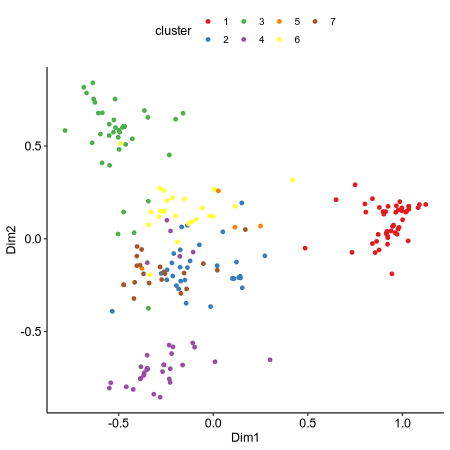

In [9]:
options(repr.plot.width=6, repr.plot.height=6,repr.plot.res=75)
ps[[1]]

# Process ReDeeM data (batch1)

In [10]:
## Read Batch1 mito genotypes and depths
WD<-paste(Dir,"/data/CRISPR/batch1/",sep="")
MKP.depth<-readRDS(paste(WD,"/MKP_.depth",sep=""))
RawGenotype<-read.table(paste(WD,"RawGenotypes.Total.StrandBalance",sep=""))
RawGenotype<-RawGenotype %>% mutate(V2=gsub("_1","",Translate_simple_RNA2ATAC(V2)))
RawGenotype.list<-list()
for(i in 1:6){
    RawGenotype.sub<-subset(RawGenotype, V2 %in% CellNames[[i]])
    RawGenotype.list<-c(RawGenotype.list,list(RawGenotype.sub))
}
names(RawGenotype.list)<-Samples.batch1

#### Change MKP.depth name into ATAC names
MKP.depth<-lapply(MKP.depth,function(x){
    out<-x
    out[[2]]<-out[[2]] %>% mutate(V1=gsub("_1","",Translate_simple_RNA2ATAC(V1)))
    return(out)                        
})

The following `from` values were not present in `x`: 2, 3

The following `from` values were not present in `x`: 2, 3

The following `from` values were not present in `x`: 2, 3

The following `from` values were not present in `x`: 2, 3

The following `from` values were not present in `x`: 2, 3



## Get mito_master.list.batch1

For each sample, the following 4 components are included:
- 'Cts.Mtx.bi'
- 'd.w_jaccard'
- 'phylo'
- 'mitoTracing.Sensitive'

In [11]:
## get whitelist for batch1
MKP_mitoTracing.VerySensitive<-readRDS(paste(Dir,"/data/CRISPR/batch1/MKP_mitoTracing.VerySensitive",sep=""))
dim(MKP_mitoTracing.VerySensitive@Cts.Mtx.bi)
MKP_WhiteList<-colnames(MKP_mitoTracing.VerySensitive@Cts.Mtx.bi)

[1] 7258 2027

In [12]:
mito_master.list.batch1<-list()
for(i in 1:6){
    mito_master<-Make_MitoTracing_VS(RawGenotype.list[[i]],depth =MKP.depth,Homo=c(),WhitelistV = MKP_WhiteList)
    mito_master.list.batch1<-c(mito_master.list.batch1,list(mito_master))
}
names(mito_master.list.batch1)<-Samples.batch1

[1] 2
[1] "Sensitive :\n 4675 variants to start"
[1] "4586 variants after remove low quality cells"
[1] 2
[1] "After filtering, 166 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR

Loading required package: ape


Attaching package: ‘ape’


The following object is masked from ‘package:ggtree’:

    rotate


The following object is masked from ‘package:treeio’:

    drop.tip


The following object is masked from ‘package:dplyr’:

    where


The following objects are masked from ‘package:igraph’:

    degree, edges, mst, ring


The following object is masked from ‘package:ggpubr’:

    rotate


Loading required package: phytools

Loading required package: maps


Attaching package: ‘phytools’


The following object is masked from ‘package:treeio’:

    read.newick


Loading required package: phangorn


Attaching package: ‘phangorn’


The following object is masked from ‘package:igraph’:

    diversity


Loading required package: tidytree

If you use the ggtree package suite in published research, please
cite the appropriate paper(s):

Guangchuang Yu.  Data Integration, Manipulation and Visualization 

[1] 2
[1] "Sensitive :\n 3482 variants to start"
[1] "3402 variants after remove low quality cells"
[1] 2
[1] "After filtering, 87 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 5108 variants to start"
[1] "5015 variants after remove low quality cells"
[1] 2
[1] "After filtering, 194 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 5583 variants to start"
[1] "5490 variants after remove low quality cells"
[1] 2
[1] "After filtering, 229 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 3167 variants to start"
[1] "3098 variants after remove low quality cells"
[1] 2
[1] "After filtering, 103 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 4860 variants to start"
[1] "4744 variants after remove low quality cells"
[1] 2
[1] "After filtering, 187 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



## Extended Data Fig. 5c

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


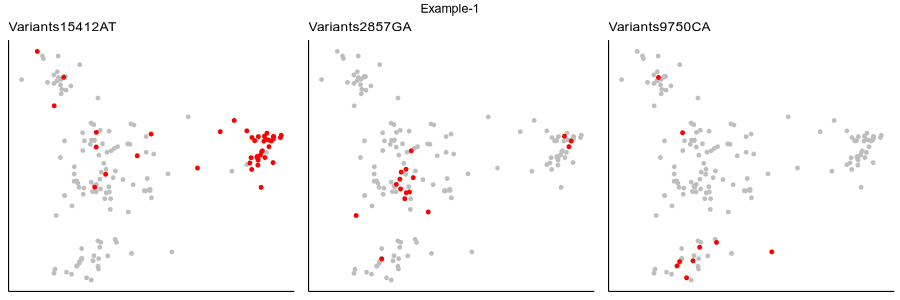

In [13]:
## To run this mito_master.list.batch1 from the next session is needed.
options(repr.plot.width=12, repr.plot.height=4,repr.plot.res=75)
Examples.p<-DrawMito_onCrispr2(whm.cmd=whm.cmd.list.batch1[[1]],mito_master.list.batch1[[1]]$Cts.Mtx.bi,
                  Select_V=c("Variants15412AT","Variants2857GA","Variants9750CA"))
grid.arrange(grobs=Examples.p,top="Example-1",nrow=1)

# CRISPR vs ReDeeM analysis (batch1)

## Compute agreement of closeness

In [14]:
Mito2Crispr.df.list.batch1<-list()
for (i in 1:6){
    df<-RunMito2Crisp(whm.list.batch1[[i]],as.matrix(mito_master.list.batch1[[i]]$d.w_jaccard),mito_master.list.batch1[[i]]$Cts.Mtx.bi,k=10)
    Mito2Crispr.df.list.batch1<-c(Mito2Crispr.df.list.batch1,list(df))
}
names(Mito2Crispr.df.list.batch1)<-names(whm.list.batch1)

## Make ReDeeM phylogenetic tree

In [25]:
ps<-list()
phylo.list.batch1<-list()
for(i in 1:6){
phylo.list.batch1<-c(phylo.list.batch1,list(mito_master.list.batch1[[i]]$phylo))
p<-ggtree(as.treedata(mito_master.list.batch1[[i]]$phylo),branch.length="none")+ggtitle(names(mito_master.list.batch1)[i])
ps<-c(ps,list(p))
}
names(ps)<-Samples.batch1
# options(repr.plot.width=6, repr.plot.height=12,repr.plot.res=100)
# grid.arrange(grobs=ps)

## CRISPR and ReDeeM clonal clustering

In [27]:
## Defined functions for Varying parameters of ReDeeM clonal clustering
source(paste(Dir,"/API/Revision.api",sep=""))

In [29]:
## use function make_mitoLSI to return a list of redeemR object where object@Seurat stores the ReDeeM LSI clonal info
mitotracing_LSI.list_0.6<-suppressMessages(make_mitoLSI(mito_master.list.batch1,0.6))
mitotracing_LSI.list_0.8<-suppressMessages(make_mitoLSI(mito_master.list.batch1,0.8))
mitotracing_LSI.list_1<-suppressMessages(make_mitoLSI(mito_master.list.batch1,1))
mitotracing_LSI.list_1.2<-suppressMessages(make_mitoLSI(mito_master.list.batch1,1.2))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 174
Number of edges: 7938

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5021
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."


Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126
Number of edges: 6318

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4442
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 167
Number of edges: 7624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4525
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 165
Number of edges: 8069

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4539
Number of communities: 2
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100
Number of edges: 4230

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4044
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 172
Number of edges: 8424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4467
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 174
Number of edges: 7938

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3771
Number of communities: 3
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126
Number of edges: 6318

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2947
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 167
Number of edges: 7624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3004
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 165
Number of edges: 8069

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3019
Number of communities: 2
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100
Number of edges: 4230

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2411
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 172
Number of edges: 8424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3025
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 174
Number of edges: 7938

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2806
Number of communities: 4
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126
Number of edges: 6318

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1766
Number of communities: 3
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 167
Number of edges: 7624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1684
Number of communities: 4
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 165
Number of edges: 8069

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1758
Number of communities: 4
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100
Number of edges: 4230

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1302
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 172
Number of edges: 8424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2062
Number of communities: 3
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 174
Number of edges: 7938

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2130
Number of communities: 4
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126
Number of edges: 6318

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1192
Number of communities: 6
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 167
Number of edges: 7624

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1018
Number of communities: 7
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 165
Number of edges: 8069

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1003
Number of communities: 9
Elapse

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work, tol = tol):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100
Number of edges: 4230

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0552
Number of communities: 7
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 172
Number of edges: 8424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1399
Number of communities: 7
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."


In [30]:
## Perform CRISPR clonal clustering
whm.hc.lovein.list.batch1<-crispr_clustering(whm.list.batch1,hcN=6,res=0.3) 
## Perform ReDeeM clonal clustering
whm.hc.lovein_Jacclone.list.batch1<-make_whm.cmd.lovein_Jacc(whm.hc.lovein.list.batch1, phylo.list=phylo.list.batch1,min=5,pro=0.3, dump=0,whm.list=whm.list.batch1)
## Add ReDeeM LSI clonal clustering
whm.hc.lovein_Jacclone.LSI.list.batch1<-make_whm.cmd.lv.jac.lsi(mitotracing_LSI.list_1.2, whm.hc.lovein_Jacclone.list.batch1,whm.list=whm.list.batch1)

## Adjusted Rand index 

In [32]:
## Test louvain resolution 0.6~1.2 for CRISPR clonal clustering vs resolution 0.6~1.2 for ReDeeM LSI clonal resolution
## The key funcion is get_rand_summary, see Revision.API
res<-c(0.6,0.8,1,1.2)
LSIs<-c(list(mitotracing_LSI.list_0.6),list(mitotracing_LSI.list_0.8),list(mitotracing_LSI.list_1),list(mitotracing_LSI.list_1.2))

#### Here compute the rand index for multiple conditions
Rand_result_summary<-c()
for (i in 1:4){
    for (j in 1:4){
        data<-cbind(get_rand_summary(res=res[i],mitotracing_LSI.list=LSIs[[j]],whm.list=whm.list.batch1,phylo.list=phylo.list.batch1),res_CRSP=res[i],res_Mito=res[j]) %>% tibble::rownames_to_column("Sample")
        Rand_result_summary<-rbind(Rand_result_summary,data)
    }
}
Rand_result_summary_high_0.6_1.2<-Rand_result_summary

In [33]:
## Change tumor names to match the publication
Rand_result_summary_high_0.6_1.2$Sample<-plyr::mapvalues(from=c('CD24_1','CD47_1','CD47_2','Ctrl_1','Ctrl_2','DKO_1'),to=c('CD24_1:T1','CD47_1:T6','CD47_2:T2','Ctrl_1:T5','Ctrl_2:T3','DKO_1:T4'),Rand_result_summary_high_0.6_1.2$Sample)

Using Sample as id variables



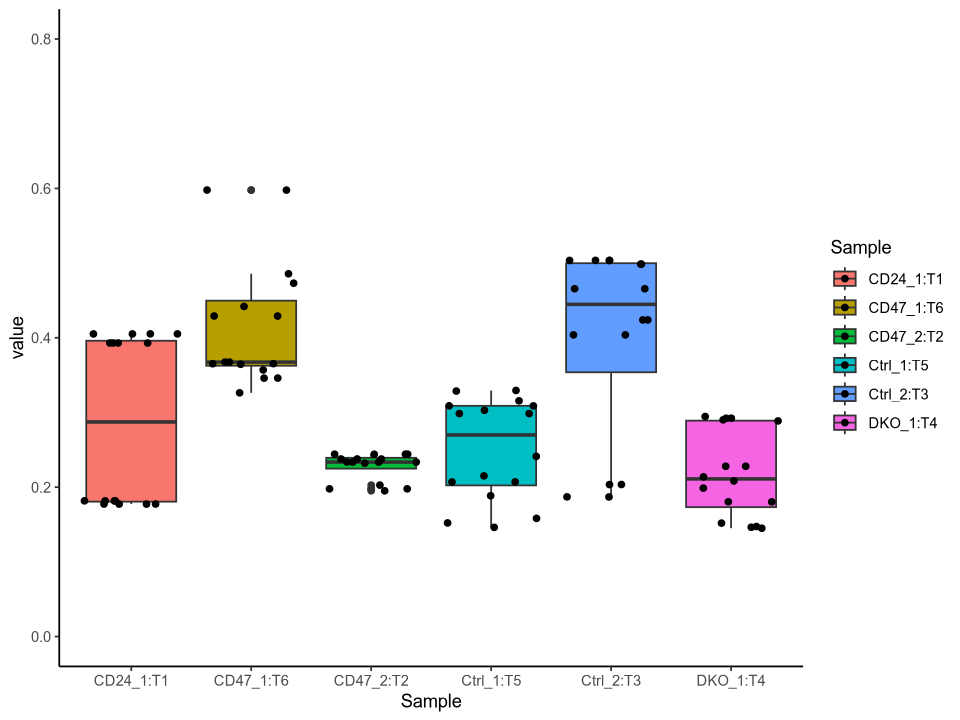

In [34]:
datatoplot_rand.batch1<-Rand_result_summary_high_0.6_1.2  %>% .[,c("Sample","ARI")] %>% reshape2::melt()
ggplot(datatoplot_rand.batch1)+aes(Sample,value,fill=Sample)+geom_boxplot()+geom_jitter()+ylim(0,0.8)+theme_classic() -> p.rand

options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=120)
print(p.rand)

## Extended Data Fig. 5g

In [36]:
# (can be Skipped if clonal clustering has been run above)
## Perform CRISPR clonal clustering
whm.hc.lovein.list.batch1<-crispr_clustering(whm.list.batch1,hcN=6,res=0.3) 
## Perform ReDeeM clonal clustering
whm.hc.lovein_Jacclone.list.batch1<-make_whm.cmd.lovein_Jacc(whm.hc.lovein.list.batch1, phylo.list=phylo.list.batch1,min=5,pro=0.3, dump=0,whm.list=whm.list.batch1)
## Add ReDeeM LSI clonal clustering, see below
whm.hc.lovein_Jacclone.LSI.list.batch1<-make_whm.cmd.lv.jac.lsi(mitotracing_LSI.list_1.2, whm.hc.lovein_Jacclone.list.batch1,whm.list=whm.list.batch1)

In [38]:
# Extract unique levels
unique_clones <- unique(whm.hc.lovein_Jacclone.LSI.list.batch1[[1]]$LSI_clones)

# Generate color palette, one less than the number of unique values
colors <- scales::hue_pal()(length(unique_clones)-1)

colors<-c(colors,"red")

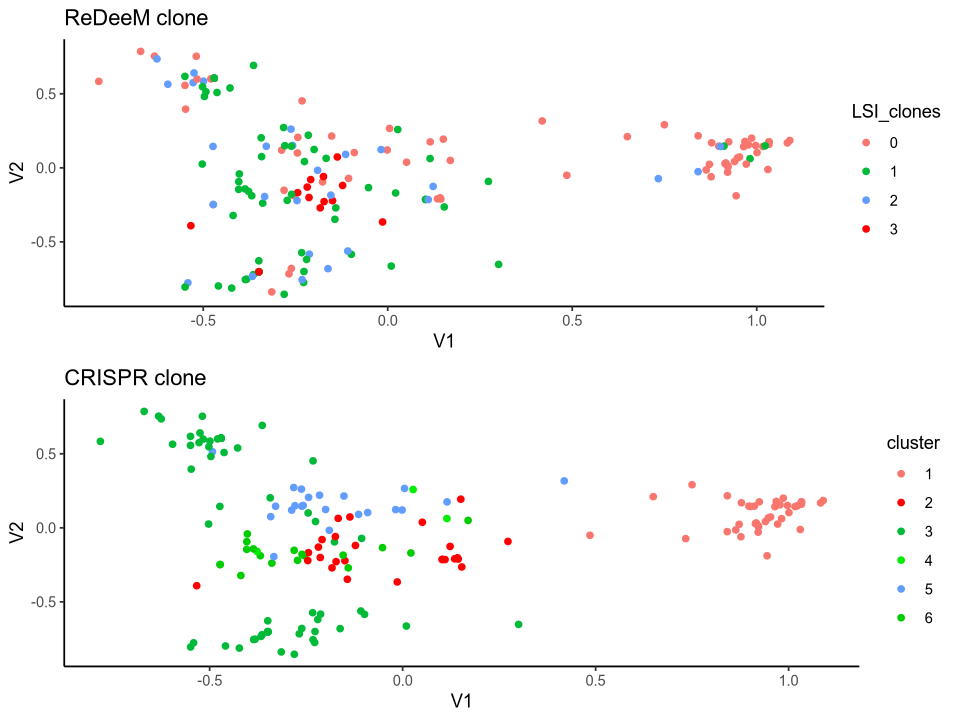

In [39]:
p1<-whm.hc.lovein_Jacclone.LSI.list.batch1[[1]] %>% ggplot()+aes(V1,V2,color=LSI_clones)+geom_point()+theme_classic()+scale_color_manual(values=colors)+ggtitle("ReDeeM clone") # +scale_color_manual(values=colors)
p2<-whm.hc.lovein_Jacclone.LSI.list.batch1[[1]] %>% ggplot()+aes(V1,V2,color=cluster)+geom_point()+theme_classic() +scale_color_manual(values=c(colors[1],"red",colors[2],"green2",colors[3],"green3"))+ggtitle("CRISPR clone")# scale_color_npg()
grid.arrange(p1,p2)

## Extended Data Fig. 5e clone+tree

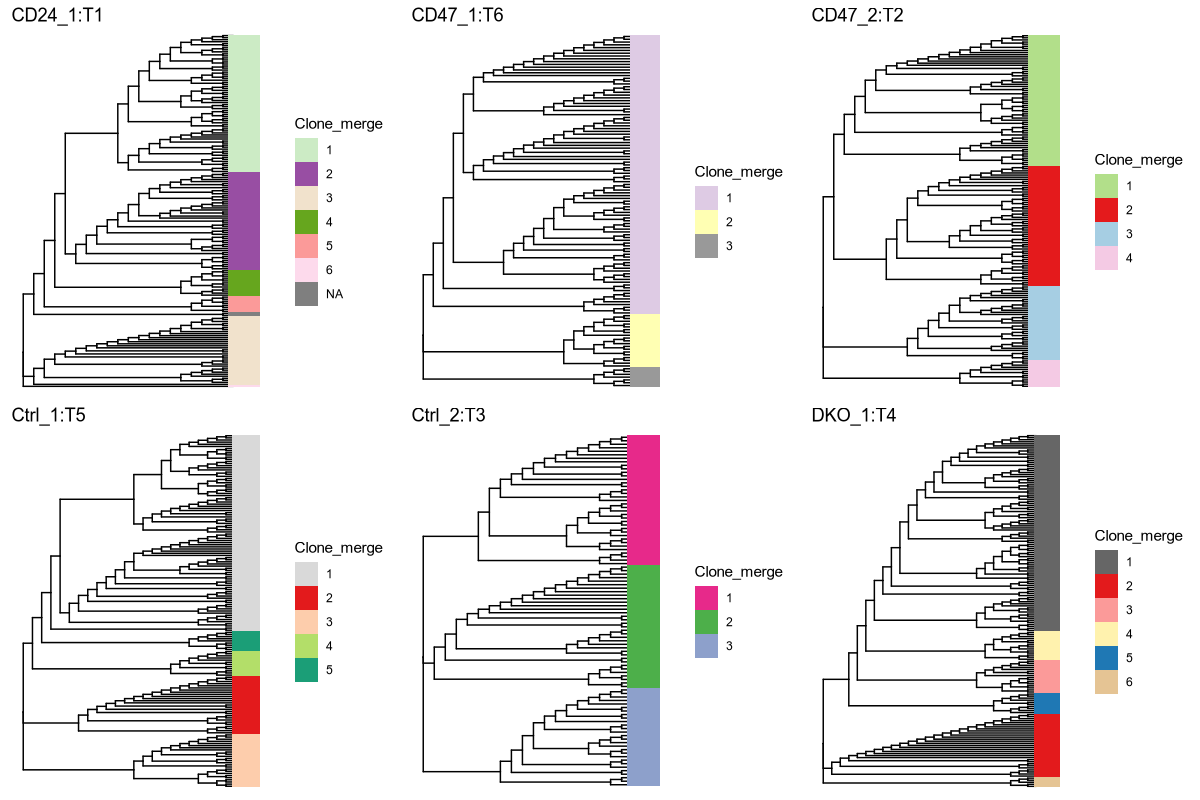

In [40]:
plot_titles<-paste(c('CD24_1','CD47_1','CD47_2','Ctrl_1','Ctrl_2','DKO_1'),c('T1','T6','T2','T5','T3','T4'),sep=":")
ps<-list()
col.list<-list()
for(i in 1:6){
    res<-Draw_tree_Clone(meta=whm.hc.lovein_Jacclone.LSI.list.batch1[[i]],phy=phylo.list.batch1[[i]],CloneCat="Clone_merge",title=plot_titles[i])
    ps<-c(ps,list(res[[1]]))
    col.list<-c(col.list,list(res[[2]]))
}
options(repr.plot.width=12, repr.plot.height=8,repr.plot.res=100)
grid.arrange(grobs=ps,nrow=2)

## Extended Data Fig. 5e AOC

In [41]:
plot_titles<-paste(c('CD24_1','CD47_1','CD47_2','Ctrl_1','Ctrl_2','DKO_1'),c('T1','T6','T2','T5','T3','T4'),sep=":")

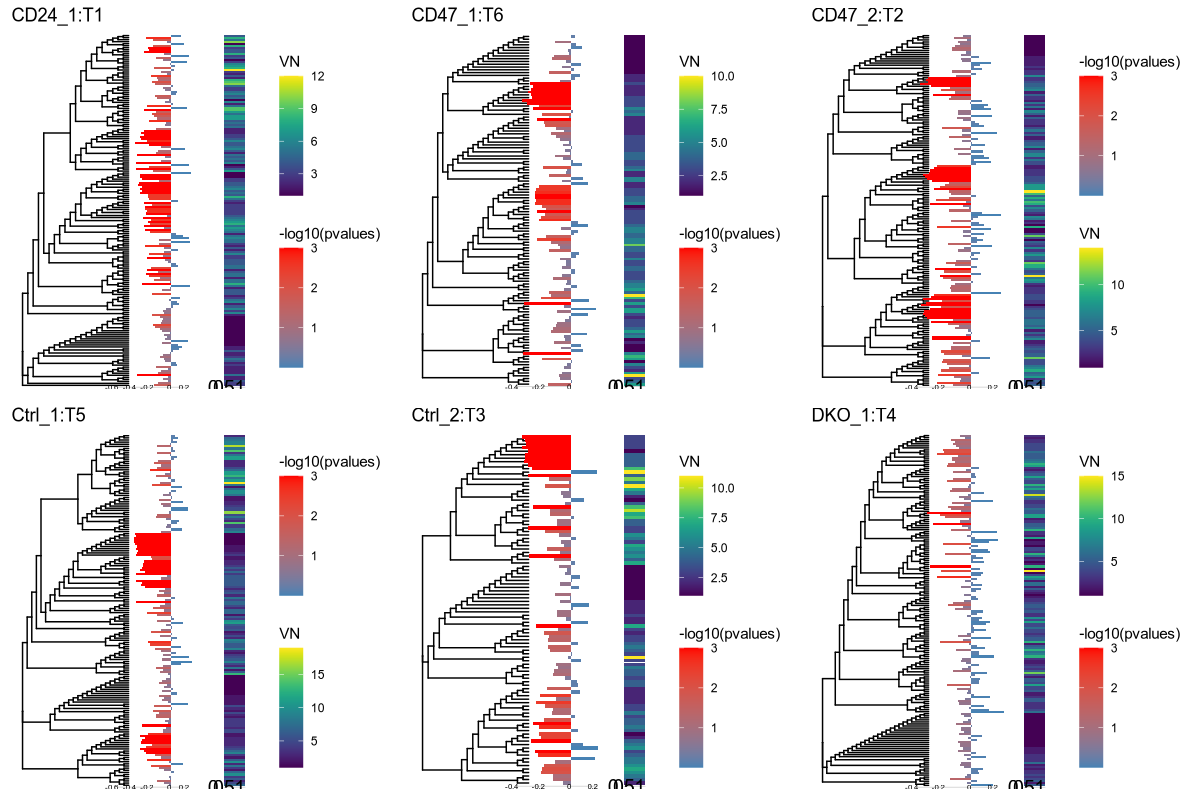

In [43]:
ps<-list()
for(i in 1:6){
    p<-Draw_Mito2Crispr(phylo.list.batch1[[i]],Mito2Crispr.df.list.batch1[[i]])+ggtitle(plot_titles[i])
    ps<-c(ps,list(p))
}
options(repr.plot.width=12, repr.plot.height=8,repr.plot.res=100)
grid.arrange(grobs=ps,nrow=2)

## Extended Data Fig. 5e positive AOC

In [46]:
## Compute overall positive AOC
for(i in 1:6){
    pos=Mito2Crispr.df.list.batch1[[i]] %>% subset(.,EffectSizes>0) %>% nrow
    print(paste(plot_titles[i],pos/nrow(Mito2Crispr.df.list.batch1[[i]])))
}

[1] "CD24_1:T1 0.798850574712644"
[1] "CD47_1:T6 0.746031746031746"
[1] "CD47_2:T2 0.712574850299401"
[1] "Ctrl_1:T5 0.76969696969697"
[1] "Ctrl_2:T3 0.77"
[1] "DKO_1:T4 0.604651162790698"


In [47]:
## Compute clone-by-clone positive AOC
Clone_Ratio_AOC.list<-c()
for (i in 1:6){
    Ratio_AOC<-merge(Mito2Crispr.df.list.batch1[[i]],whm.hc.lovein_Jacclone.list.batch1[[i]],by="Cell") %>% group_by(Clone_merge) %>% dplyr::summarise(Ratio_AOC=sum(EffectSizes>0)/n())
    Clone_Ratio_AOC.list<-c(Clone_Ratio_AOC.list,list(Ratio_AOC))
}
names(Clone_Ratio_AOC.list)<-plot_titles

In [48]:
Clone_Ratio_AOC.list

Clone_merge,Ratio_AOC
<int>,<dbl>
1,0.8088235
2,0.8125000
3,0.7941176
4,0.8461538
5,0.5000000
6,1.0000000
NA,1.0000000
Clone_merge,Ratio_AOC
<int>,<dbl>


## Supplementary Fig. 2a: Identify Specific mito V on Crispr neighbourhood

In [50]:
Specific_Mito_ByNeighbor.list<-list()
for (i in 1:6){
    Specific_Mito_ByNeighbor<-Compute_specific_mito.neighbor(whm.list.batch1[[i]],mito_master.list.batch1[[i]]$Cts.Mtx.bi,CellNcut=4,reshuffleN = 1000)
    Specific_Mito_ByNeighbor.list<-c(Specific_Mito_ByNeighbor.list,list(Specific_Mito_ByNeighbor))
}
names(Specific_Mito_ByNeighbor.list)<-names(whm.list.batch1)

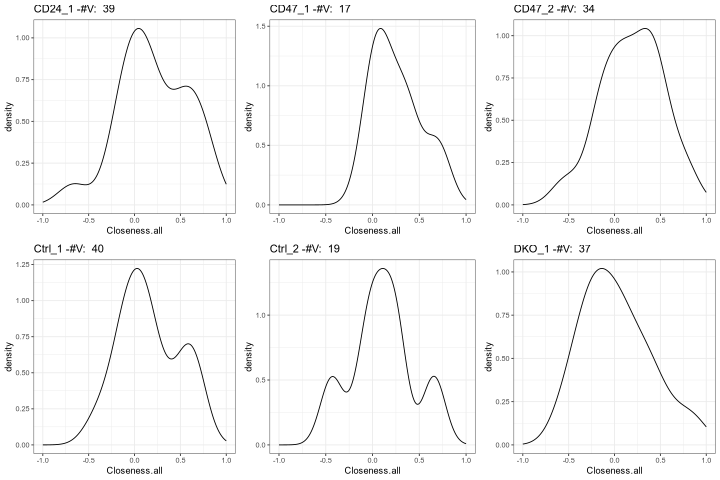

In [51]:
hists<-list()
for(i in 1:6){
    p<-Specific_Mito_ByNeighbor.list[[i]] %>% ggplot()+aes(Closeness.all)+geom_density()+xlim(-1,1)+
    ggtitle(paste(names(Specific_Mito_ByNeighbor.list)[i],"-#V: ",as.character(nrow(Specific_Mito_ByNeighbor.list[[i]]))))+theme_bw()
    hists<-c(hists,list(p))
}
options(repr.plot.width=12, repr.plot.height=8,repr.plot.res=60)
grid.arrange(grobs=hists,nrow=2)

## Supplementary Fig. 2b

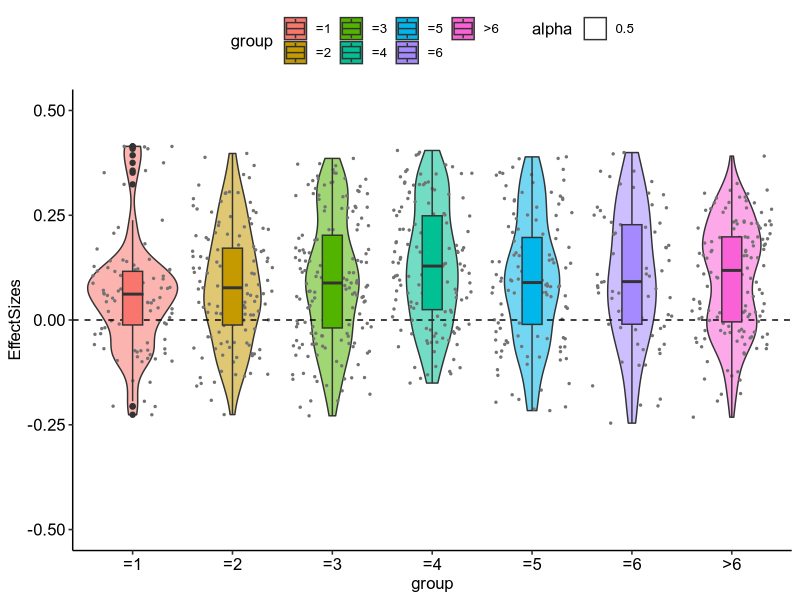

In [55]:
All.Mito2Crispr.df<-lapply(names(Mito2Crispr.df.list.batch1),function(name){
    df<-Mito2Crispr.df.list.batch1[[name]]
    df$Sample<-name
    return(df)
}) %>% do.call(rbind,.) %>% mutate(group=case_when(VN==1 ~ "=1",
                                                   VN==2 ~ "=2",
                                                   VN==3 ~ "=3",
                                                   VN==4 ~ "=4",
                                                   VN==5 ~ "=5",
                                                   VN==6 ~ "=6",
                                                   TRUE ~ ">6" ))  

options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=100)
ggplot(All.Mito2Crispr.df)+aes(group,EffectSizes,fill=group)+geom_violin(aes(alpha=0.5))+geom_jitter(size=0.5,color="grey45")+geom_hline(yintercept=0,linetype=2)+
geom_boxplot(width=0.2)+ylim(-0.5,0.5)+theme_pubr()

# Repeat main analysis on Batch 2

In [16]:
Samples.batch2<-c("NT1","NT2","T24_1","T24_2","T24_3","T47_1")
plot.titles<-c("NT1:T7","NT2:T9","T24_1:NA","T24_2:T8","T24_3:NA","T47_1:T10")

In [17]:
## Read in a list of weighted hamming distance for each sample
whm.list.batch2<-list()
for(name in Samples.batch2){
filename=paste(Dir,"/data/CRISPR/batch2/weighted_hm_distance.",name,sep="")
    whm<-read.csv(filename,row.names = 1)
    whm.list.batch2<-c(whm.list.batch2,list(whm))
}
names(whm.list.batch2)<-Samples.batch2

In [18]:
whm.list.batch2<-lapply(whm.list.batch2,function(x){
    x[is.na(x)]<-1
    return(x)
})
#### CellNames are ATAC version names
CellNames.batch2<-lapply(whm.list.batch2,function(x){gsub("_","",Translate_simple_RNA2ATAC(row.names(x)))})
for(i in 1:6){
    row.names(whm.list.batch2[[i]])<-colnames(whm.list.batch2[[i]])<-paste(CellNames.batch2[[i]],"_1",sep="")
}

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3

The following `from` values were not present in `x`: 1, 2, 3



In [60]:
## Read Batch2 mito genotypes and depths
WD<-paste(Dir,"/data/CRISPR/batch2/",sep="")
MKP.depth.batch2<-readRDS(paste(WD,"/MKP2.depth",sep=""))
RawGenotype.batch2<-read.table(paste(WD,"RawGenotypes.Total.StrandBalance",sep=""))
#RawGenotype.batch2<-RawGenotype.batch2 %>% mutate(V2=gsub("_1","",Translate_simple_RNA2ATAC(V2)))
RawGenotype.list.batch2<-list()
for(i in 1:6){
    RawGenotype.sub<-subset(RawGenotype.batch2, V2 %in% CellNames.batch2[[i]])
    RawGenotype.list.batch2<-c(RawGenotype.list.batch2,list(RawGenotype.sub))
}
names(RawGenotype.list.batch2)<-names(whm.list.batch2)
names(RawGenotype.list.batch2)

[1] "NT1"   "NT2"   "T24_1" "T24_2" "T24_3" "T47_1"

In [19]:
whm.cmd.list.batch2<-list()
ps.batch2<-list()
for(i in 1:length(whm.list.batch2)){
    whm.cmd<-Run_Crispr(whm.list.batch2[[i]],N=7)
    whm.cmd.list.batch2<-c(whm.cmd.list.batch2,list(whm.cmd[[1]]))
    ps.batch2<-c(ps,list(whm.cmd[[2]]))
}

In [62]:
## get whitelist for batch2
MKP2_mitoTracing.VerySensitive<-readRDS(paste(Dir,"/data/CRISPR/batch2/MKP2_mitoTracing.VerySensitive",sep=""))
dim(MKP2_mitoTracing.VerySensitive@Cts.Mtx.bi)
MKP2_WhiteList<-colnames(MKP2_mitoTracing.VerySensitive@Cts.Mtx.bi)

[1] 7251 2684

In [63]:
mito_master.list.batch2<-list()
for(i in 1:6){
    mito_master<-Make_MitoTracing_VS(RawGenotype.list.batch2[[i]],depth =MKP.depth.batch2,Homo=c(),WhitelistV = MKP2_WhiteList)
    mito_master.list.batch2<-c(mito_master.list.batch2,list(mito_master))
}
names(mito_master.list.batch2)<-Samples.batch2

[1] 2
[1] "Sensitive :\n 32358 variants to start"
[1] "32290 variants after remove low quality cells"
[1] 2
[1] "After filtering, 2252 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 17446 variants to start"
[1] "17365 variants after remove low quality cells"
[1] 2
[1] "After filtering, 1067 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 26785 variants to start"
[1] "26729 variants after remove low quality cells"
[1] 2
[1] "After filtering, 1869 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 30537 variants to start"
[1] "30493 variants after remove low quality cells"
[1] 2
[1] "After filtering, 2124 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 19813 variants to start"
[1] "19772 variants after remove low quality cells"
[1] 2
[1] "After filtering, 1267 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



[1] 2
[1] "Sensitive :\n 15627 variants to start"
[1] "15478 variants after remove low quality cells"
[1] 2
[1] "After filtering, 921 Variants left"
[1] "\n\n"


Create_mitoTracing has been deprecated, please use Create_redeemR



In [65]:
# mtDNA-mutation-based phylogenetic tree for batch2
ps<-list()
phylo.list.batch2<-list()
for(i in 1:6){
phylo.list.batch2<-c(phylo.list.batch2,list(mito_master.list.batch2[[i]]$phylo))
p<-ggtree(as.treedata(mito_master.list.batch2[[i]]$phylo),branch.length="none")+ggtitle(names(mito_master.list.batch2)[i])
ps<-c(ps,list(p))
}
names(ps)<-Samples.batch2

In [66]:
Mito2Crispr.df.list.batch2<-list()
for (i in 1:6){
    df<-RunMito2Crisp(whm.list.batch2[[i]],as.matrix(mito_master.list.batch2[[i]]$d.w_jaccard),mito_master.list.batch2[[i]]$Cts.Mtx.bi,k=12,reshuffleN=1000)
    Mito2Crispr.df.list.batch2<-c(Mito2Crispr.df.list.batch2,list(df))
}
names(Mito2Crispr.df.list.batch2)<-names(whm.list.batch2)

In [71]:
mitotracing_LSI.list_0.2.batch2<-suppressMessages(make_mitoLSI(mito_master.list.batch2,0.2))
mitotracing_LSI.list_0.3.batch2<-suppressMessages(make_mitoLSI(mito_master.list.batch2,0.3))
mitotracing_LSI.list_0.4.batch2<-suppressMessages(make_mitoLSI(mito_master.list.batch2,0.4))
mitotracing_LSI.list_0.6.batch2<-suppressMessages(make_mitoLSI(mito_master.list.batch2,0.6))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1304
Number of edges: 43407

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9278
Number of communities: 9
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 378
Number of edges: 13236

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8146
Number of communities: 2
Elapsed time: 0 seconds
[1] "Some variant i weight is not found in cell-variant matrix, use 1"
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 813
Number of edges: 26031

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9082
Number of communities: 6
El

In [72]:
## Perform CRISPR clonal clustering
whm.hc.lovein.list.batch2<-crispr_clustering(whm.list.batch2,hcN=4,res=0.3) 
## Perform ReDeeM clonal clustering
whm.hc.lovein_Jacclone.list.batch2<-make_whm.cmd.lovein_Jacc(whm.hc.lovein.list.batch2, phylo.list.batch2, min=30,pro=0.3, dump=100,whm.list.batch2) 
## Add ReDeeM LSI clonal clustering, see below
whm.hc.lovein_Jacclone.LSI.list.batch2<-make_whm.cmd.lv.jac.lsi(mitotracing_LSI.list_0.6.batch2, whm.hc.lovein_Jacclone.list.batch2,whm.list=whm.list.batch2)

In [80]:
head(whm.hc.lovein_Jacclone.list.batch2[[i]])

,Cell,V1,V2,cluster,lovein,Clade_merge,Clone_merge
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>
1,AAACCGCCAGCCAATA_1,-0.14203844,-0.02929436,1,5,1547,16
2,AAACCGGTCCCGGATT_1,0.06096192,0.39277029,1,4,1313,2
3,AAACCGGTCTCAAGAA_1,-0.14914831,0.06898336,1,3,1325,3
4,AAACGAACAAGGGAGC_1,0.57136577,-0.53779746,4,10,1334,14
5,AAACGGTTCAGGAGGG_1,0.27381471,-0.57297076,4,10,1374,7
6,AAACTCGCACTAATCC_1,-0.08116817,0.29573041,1,4,1380,8


In [81]:
## Only use T24_2, while T24_1 and T24_3 are not used becuse of some potantial experimental mistakes on the hash label of T24_1 and T24_3
plot.titles<-c("NT1:T7","NT2:T9","T24_1:NA","T24_2:T8","T24_3:NA","T47_1:T10")
ps<-list()
for(i in c(1,2,4,6)){
    p<-Draw_Mito2Crispr_clone(phylo.list.batch2[[i]],Mito2Crispr.df.list.batch2[[i]],whm.hc.lovein_Jacclone.LSI.list.batch2[[i]])+ggtitle(plot.titles[i])
    ps<-c(ps,list(p))
}


## Supplementary Fig. 3a

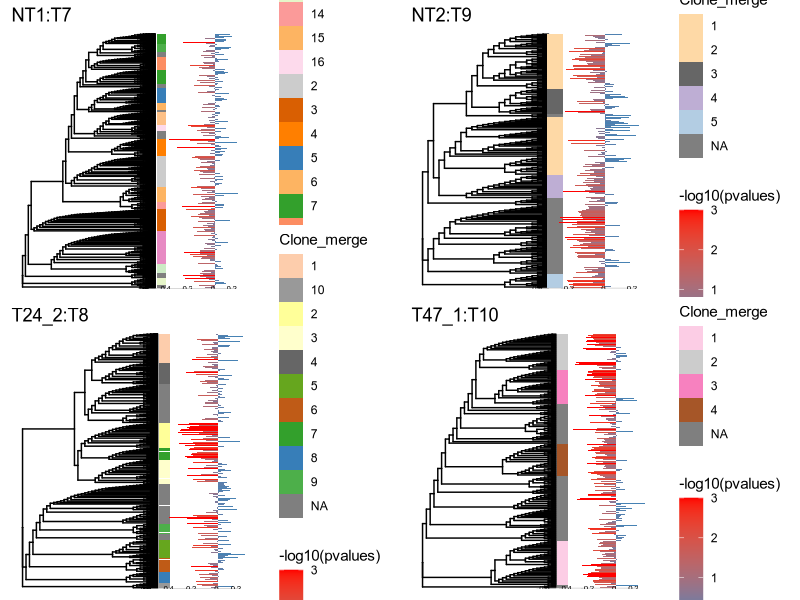

In [83]:
grid.arrange(grobs=ps)

In [84]:
for(i in c(1,2,4,6)){
    pos=Mito2Crispr.df.list.batch2[[i]] %>% subset(.,EffectSizes>0) %>% nrow
    print(paste(plot.titles[i],pos/nrow(Mito2Crispr.df.list.batch2[[i]])))
}


[1] "NT1:T7 0.637269938650307"
[1] "NT2:T9 0.735449735449735"
[1] "T24_2:T8 0.653691275167785"
[1] "T47_1:T10 0.795275590551181"


In [85]:
Clone_Ratio_AOC.list.batch2<-c()
for (i in c(1,2,4,6)){
    Ratio_AOC<-merge(Mito2Crispr.df.list.batch2[[i]],whm.hc.lovein_Jacclone.list.batch2[[i]],by="Cell") %>% group_by(Clone_merge) %>% dplyr::summarise(Ratio_AOC=sum(EffectSizes>0)/n())
    Clone_Ratio_AOC.list.batch2<-c(Clone_Ratio_AOC.list.batch2,list(Ratio_AOC))
}
names(Clone_Ratio_AOC.list.batch2)<-plot.titles[c(1,2,4,6)]

In [86]:
Clone_Ratio_AOC.list.batch2

Clone_merge,Ratio_AOC
<int>,<dbl>
1,0.7289157
2,0.7672956
3,0.8738739
4,0.4705882
5,0.4743590
6,0.6666667
7,0.5352113
8,0.5797101
9,0.5156250


## Supplementary Fig. 3b

In [87]:
Exp.list.batch2<-lapply(whm.cmd.list.batch2,function(x){prop.table(table(x$cluster))})

In [88]:
specific_mito.list<-list()
for(i in 1:6){
    res<-Compute_specific_mito(whm.cmd.list.batch2[[i]],mito_master.list.batch2[[i]]$Cts.Mtx.bi,exp = Exp.list.batch2[[i]])
    specific_mito.list<-c(specific_mito.list,list(res))
}


In [89]:
#### Select mutations for visulization
specific_mito.list[[2]] %>% mutate(ratio=Xs/Totals) %>% .[order(.$qs,decreasing=F),] %>% head

,Variants,ps,FCs,Xs,Totals,qs,Cluster,ratio
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
122,Variants14581TC,6.088318e-10,0.3638273,162,185,5.662136e-08,2,0.8756757
514,Variants4238GA,1.543043e-08,4.9790404,6,13,1.435030e-06,6,0.4615385
186,Variants9985GA,2.835707e-04,0.1863337,223,288,1.318604e-02,2,0.7743056
12,Variants12787GC,6.190377e-04,0.8604623,33,207,5.757051e-02,1,0.1594203
1,Variants10807TC,3.113686e-03,2.5095551,4,8,6.929853e-02,1,0.5000000
44,Variants3717TA,5.216018e-03,2.3396301,4,9,6.929853e-02,1,0.4444444


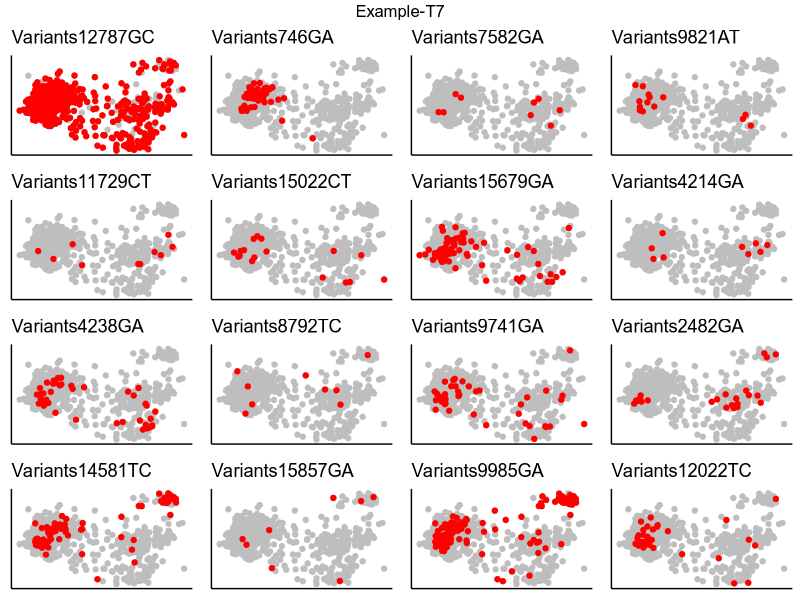

In [90]:
Examples.p<-DrawMito_onCrispr2(whm.cmd=whm.cmd.list.batch2[[1]],mito_master.list.batch2[[1]]$Cts.Mtx.bi,
                  Select_V=subset(specific_mito.list[[1]],ps<=0.01)$Variants)
grid.arrange(grobs=Examples.p,top="Example-T7")

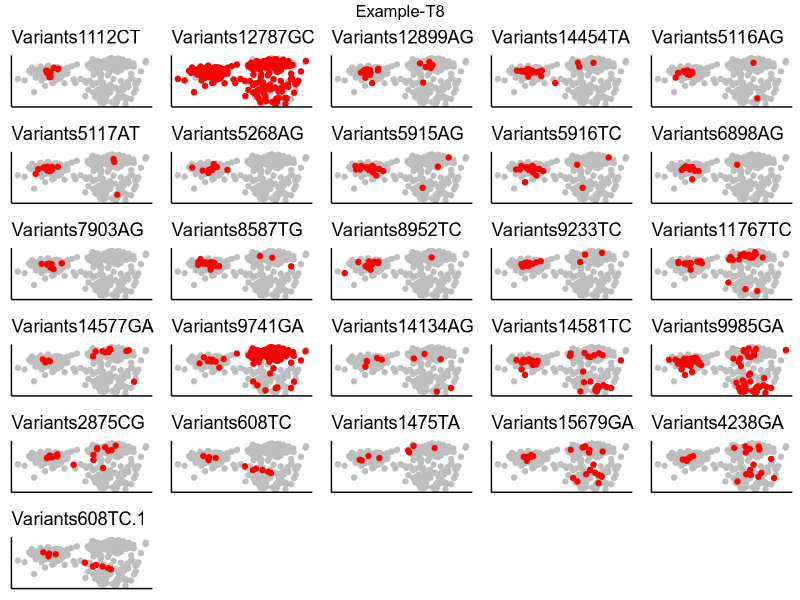

In [91]:
Examples.p<-DrawMito_onCrispr2(whm.cmd=whm.cmd.list.batch2[[4]],mito_master.list.batch2[[4]]$Cts.Mtx.bi,
                  Select_V=subset(specific_mito.list[[4]],ps<=0.01)$Variants)
grid.arrange(grobs=Examples.p,top="Example-T8")

## Adjusted Rand Index

In [92]:
### Here compute the rand index for multiple conditions
## The key funcion is get_rand_summary, see Revision.API
res<-c(0.1,0.2,0.3,0.4)
LSIs<-c(list(mitotracing_LSI.list_0.2.batch2),list(mitotracing_LSI.list_0.3.batch2),list(mitotracing_LSI.list_0.4.batch2),list(mitotracing_LSI.list_0.6.batch2))

Rand_result_summary<-c()
for (i in 1:4){
    for (j in 1:4){
        data<-cbind(get_rand_summary(res[i],LSIs[[j]],whm.list.batch2,phylo.list.batch2),res_CRSP=res[i],res_Mito=res[j]) %>% tibble::rownames_to_column("Sample")
        Rand_result_summary<-rbind(Rand_result_summary,data)
    }
}
Rand_result_summary_batch2<-Rand_result_summary

In [93]:
Rand_result_summary_batch2$Sample<-plyr::mapvalues(from=c("NT1","NT2","T24_1","T24_2","T24_3","T47_1"),to=c("NT1:T7","NT2:T9",NA,"T24_2:T8",NA,"T47_1:T10"),Rand_result_summary_batch2$Sample)

Using Sample as id variables

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


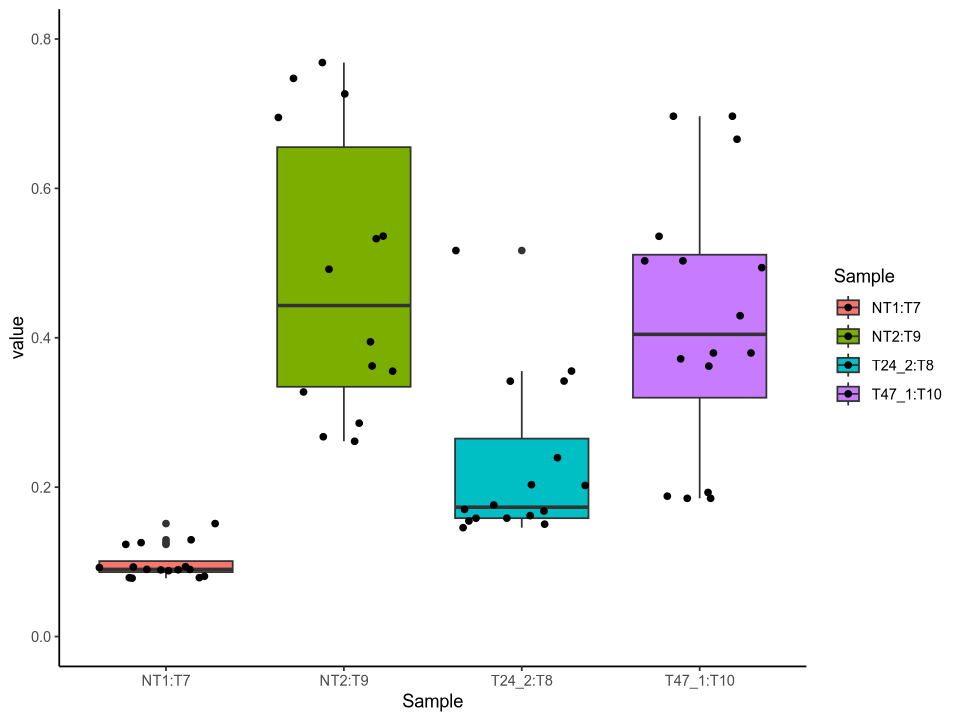

In [94]:
datatoplot_rand.batch2<-Rand_result_summary_batch2 %>% subset(.,!is.na(Sample)) %>% .[,c("Sample","ARI")] %>% reshape2::melt() 
ggplot(datatoplot_rand.batch2)+aes(Sample,value,fill=Sample)+geom_boxplot()+geom_jitter()+ylim(0,0.8)+theme_classic() -> p.rand

options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=120)
print(p.rand)

## Extended Data Fig. 5h

In [99]:
## Perform CRISPR clonal clustering
whm.hc.lovein.list.batch2<-crispr_clustering(whm.list.batch2,hcN=4,res=0.3) 
## Perform ReDeeM clonal clustering
whm.hc.lovein_Jacclone.list.batch2<-make_whm.cmd.lovein_Jacc(whm.hc.lovein.list.batch2, phylo.list.batch2, min=30,pro=0.3, dump=100,whm.list.batch2) 
## Add ReDeeM LSI clonal clustering, see below
whm.hc.lovein_Jacclone.LSI.list.batch2<-make_whm.cmd.lv.jac.lsi(mitotracing_LSI.list_0.4.batch2, whm.hc.lovein_Jacclone.list.batch2,whm.list=whm.list.batch2)

In [100]:
# Extract unique levels
unique_clones <- unique(whm.hc.lovein_Jacclone.LSI.list.batch2[[2]]$LSI_clones)

# Generate color palette, one less than the number of unique values
colors <- scales::hue_pal()(length(unique_clones))

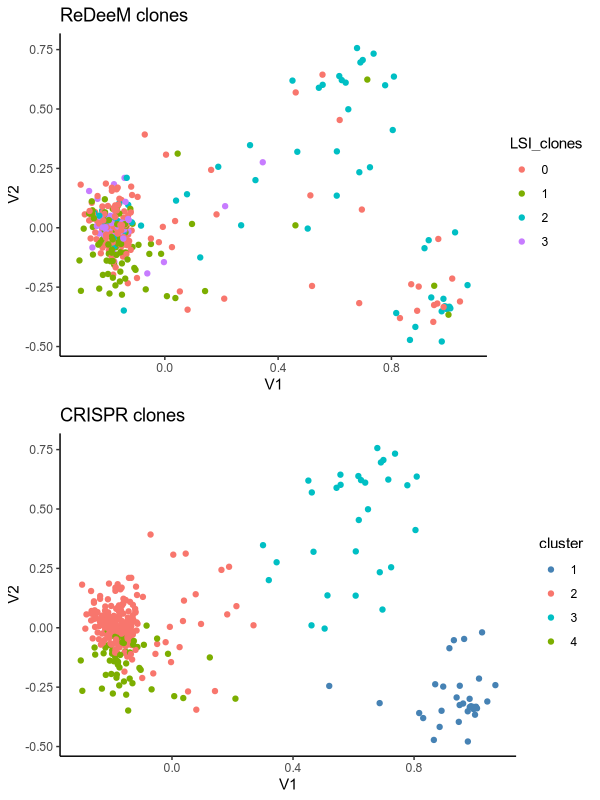

In [103]:
options(repr.plot.width=6, repr.plot.height=8,repr.plot.res=100)
p1<-whm.hc.lovein_Jacclone.LSI.list.batch2[[2]] %>% ggplot()+aes(V1,V2,color=LSI_clones)+geom_point()+theme_classic()+scale_color_manual(values=colors)+ggtitle("ReDeeM clones")# +scale_color_manual(values=colors)
p2<-whm.hc.lovein_Jacclone.LSI.list.batch2[[2]] %>% ggplot()+aes(V1,V2,color=cluster)+geom_point()+theme_classic()+scale_color_manual(values=c("steelblue",colors[1],colors[3],colors[2]))+ggtitle("CRISPR clones") # scale_color_npg()
grid.arrange(p1,p2)

## Extended Data Fig. 5f

In [111]:
Rand_result_summary_combine<-rbind(Rand_result_summary_high_0.6_1.2,subset(Rand_result_summary_batch2, Sample %in% c("NT1:T7","NT2:T9","T24_2:T8","T47_1:T10")))

In [122]:
Rand_result_summary_combine$Sample<-factor(Rand_result_summary_combine$Sample,levels=c('CD24_1:T1','CD47_2:T2','Ctrl_2:T3','DKO_1:T4','Ctrl_1:T5','CD47_1:T6','NT1:T7','T24_2:T8','NT2:T9','T47_1:T10'))

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


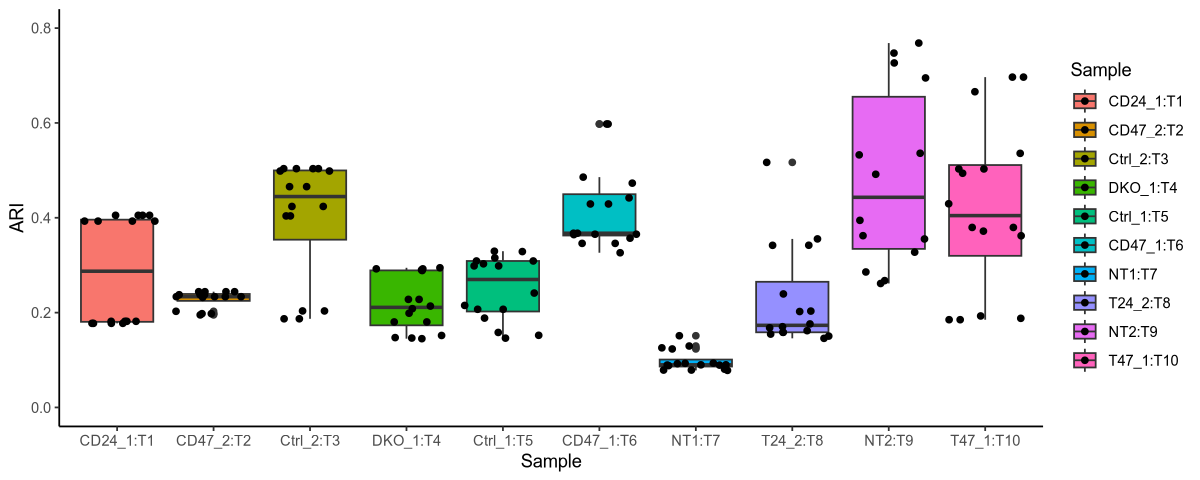

In [123]:
library(ggsci)
datatoplot<-Rand_result_summary_combine[,c("Sample","ARI","N_Mito")] 
p<-ggplot(datatoplot)+aes(Sample,ARI,fill=Sample)+geom_boxplot()+
geom_jitter()+ylim(0,0.8)+theme_classic()
options(repr.plot.width=10, repr.plot.height=4,repr.plot.res=120)
print(p)